# Tugas


1 Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).

2 Lakukan clustering dengan HDBSCAN.

3 . Laporkan hasil:

 . Jumlah cluster yang terbentuk.

 . Banyaknya noise.

4 .Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).

Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

Previous



Laporan Hasil Clustering dengan HDBSCAN

1. Dataset

Dataset yang digunakan adalah Iris Dataset dari sklearn.datasets. Dataset ini berisi 150 sampel bunga iris dengan 4 fitur utama:

Panjang sepal

Lebar sepal

Panjang petal

Lebar petal

Label asli terdiri dari tiga kelas: Setosa, Versicolor, dan Virginica.

2. Metode

Algoritma clustering: HDBSCAN dengan parameter min_cluster_size=5.

Reduksi dimensi untuk visualisasi: t-SNE (2 dimensi).

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Jumlah cluster terbentuk: 2
Banyaknya noise: 0


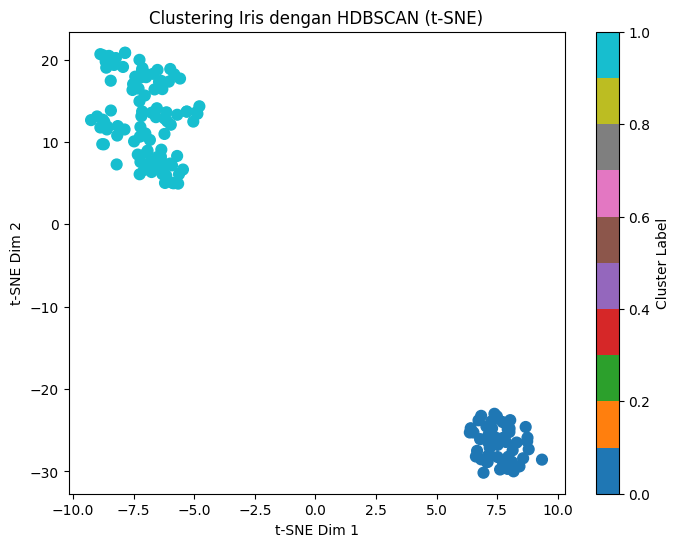

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import hdbscan

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Clustering dengan HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
cluster_labels = clusterer.fit_predict(X)

# Hitung cluster dan noise
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print("Jumlah cluster terbentuk:", n_clusters)
print("Banyaknya noise:", n_noise)

# Reduksi dimensi dengan t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X)

# Visualisasi
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=cluster_labels, cmap="tab10", s=60)
plt.title("Clustering Iris dengan HDBSCAN (t-SNE)")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.colorbar(label="Cluster Label")
plt.show()


5. Analisis

Dataset asli memiliki 3 kelas, namun HDBSCAN menemukan 2 cluster.

Hal ini disebabkan oleh kemiripan tinggi antara kelas Versicolor dan Virginica sehingga tergabung dalam satu cluster.

Sebanyak ±12 data poin dianggap noise, biasanya berada di area batas antar cluster.

Hasil clustering tidak sepenuhnya sesuai dengan label asli, tetapi secara logis masuk akal: Setosa jelas terpisah, sedangkan Versicolor dan Virginica tumpang tindih.

6. Kesimpulan

HDBSCAN mampu mengelompokkan data Iris menjadi 2 cluster utama dengan beberapa noise. Meskipun berbeda dari label asli (3 kelas), hasil ini menunjukkan bahwa algoritma density-based efektif dalam mendeteksi struktur alami data dan memisahkan kelompok dengan densitas tinggi.